# 시간대에 따른 승하차 인원 평균
* 04시~03시에 걸쳐 모든 지하철역의 승차인원, 하차인원 각각의 평균을 한눈에 보고자 하였다.
* 이를 통해서 시간대별로 승하차인원이 어떤 추이로 변하는지 보고자 하였고, 가장 승차인원이 많은 시각, 가장 하차인원이 많은 시각을 알아보고자 하였다.  
* 처음에는 DataFrame 의 describe() 메서드를 활용하여 얻어낸 mean 자료를 갖고 새로운 DataFrame으로 이를 정리하였으나 뭔가 한눈에 최댓값, 최솟값이 잘 보이지 않았고 변화 추이를 알기가 어려웠음.
* 그래서 '시간에 따른 변화'라는 속성이 꺾은선그래프로 표현하기에 좋을 것 같아 matplotlib 라이브러리의 plot 함수를 이용해서 간단하게 시각화를 해보았음.
* 그 결과, 조금 더 시간에 따른 승하차인원의 변화를 쉽게 볼 수 있었음.
* 전반적으로 승차인원 그래프와 하차인원 그래프를 비교하였을 때, 하차인원 그래프가 승차인원 그래프에 비해 뒤로 살짝 밀리는 것을 볼 수 있었음. 승차가 우선이고, 하차가 그 이후에 이루어진다는 점이 이 그래프를 통해 시각적으로 확인 가능했음.

In [1]:
import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)
subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202103,1호선,동대문,607,10,12572,1965,8945,6697,14117,...,2932,8508,9,1251,1,0,0,0,0,0
1,202103,1호선,동묘앞,73,1,2888,815,3453,4739,5946,...,1164,2317,2,1127,1,2,0,0,0,0
2,202103,1호선,서울역,668,19,9048,5684,11314,32628,35812,...,9712,7559,9,487,0,0,0,0,0,0
3,202103,1호선,시청,20,0,1722,3784,2707,18444,6099,...,3716,1242,2,72,0,0,0,0,0,0
4,202103,1호선,신설동,361,13,7927,2898,7826,9755,17350,...,2191,5072,9,308,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43509,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
43510,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
43511,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
43512,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0


In [1]:
import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)
statistics = subway.describe()
statistics

# 시간대별 전역의 승차 및 하차 인원 평균
on_mean = statistics.iloc[1, 1::2]
off_mean = statistics.iloc[1, 2::2]
pd.options.display.float_format = '{:.2f}'.format  # 소숫점 둘째 자리까지만 보이게 하는 코드 추가
time = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시'
        , '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시']
on_mean.index = time # 승차인원 평균
off_mean.index = time # 하차인원 평균

mean = pd.concat([on_mean, off_mean], axis=1) #승하차 같이 보기 위해 합침
mean.columns = ['승차인원 평균', '하차인원 평균']
mean = mean.transpose()
mean


,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
승차인원 평균,195.79,5289.95,10854.76,28462.49,32407.12,20341.98,15469.25,15596.71,16985.58,17884.23,...,36955.97,22165.95,17092.31,16331.15,13579.78,6027.05,747.81,4.52,0.24,0.02
하차인원 평균,2.83,1327.13,7191.75,16458.92,38119.65,25065.67,16464.16,15573.76,16281.70,17751.71,...,33155.27,30030.48,18583.95,16435.19,15436.38,10293.95,3163.44,105.82,1.37,0.08


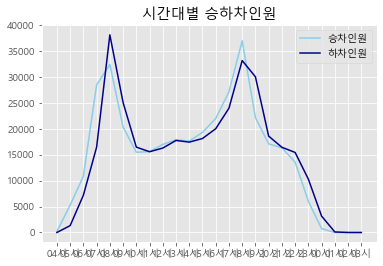

In [48]:
import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)
statistics = subway.describe()

# 시간대별 전역의 승차 및 하차 인원 평균
on_mean = statistics.iloc[1, 1::2]
off_mean = statistics.iloc[1, 2::2]
pd.options.display.float_format = '{:.2f}'.format  # 소숫점 둘째 자리까지만 보이게 하는 코드 추가
time = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시'
        , '21시', '22시', '23시', '00시', '01시', '02시', '03시']
on_mean.index = time # 승차인원 평균
off_mean.index = time # 하차인원 평균

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.title('시간대별 승하차인원')
plt.plot(time, on_mean, label='승차인원', color='skyblue')
plt.plot(time, off_mean, label='하차인원', color= 'darkblue')
plt.legend()
plt.show()

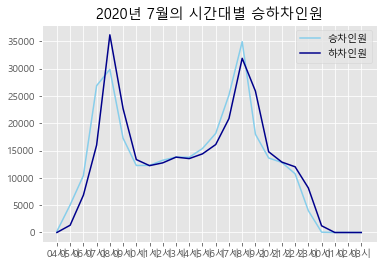

In [4]:
# 2020년 코로나 첫 확진자 발생 시기 전후 지하철 이용자 수 변화 분석

import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)

# 국내 확진자 첫 발생 날짜인 1.21 전후 변화를 살피기 위하여 202001~202003의 데이터를 살펴봄.
# 처음 서울에서 거리두기 2단계 격상이 있었던 8.16 전후 변화를 살피기 위하여 202007~202009의 데이터를 살펴봄.
sub2001 = subway.loc[subway['사용월']<202002] # 국내첫확진자발생일 1.21이지만 이 csv파일은 월로 구분되어있어 1월과 2월 비교
sub2002 = subway.loc[(subway['사용월']<202003) & (subway['사용월']>202001)]
sub2003 = subway.loc[(subway['사용월']<202004) & (subway['사용월']>202002)]
sub2007 = subway.loc[(subway['사용월']<202008) & (subway['사용월']>202006)]
sub2008 = subway.loc[(subway['사용월']<202009) & (subway['사용월']>202007)]
sub2009 = subway.loc[(subway['사용월']<202010) & (subway['사용월']>202008)]

stat2010 = sub2007.describe()
# 2020.07. 시간대별 전역의 승차 및 하차 인원 평균
on_mean = stat2010.iloc[1, 1::2]
off_mean = stat2010.iloc[1, 2::2]
pd.options.display.float_format = '{:.2f}'.format  # 소숫점 둘째 자리까지만 보이게 하는 코드 추가
time = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시']
on_mean.index = time # 승차인원 평균
off_mean.index = time # 하차인원 평균

mean = pd.concat([on_mean, off_mean], axis=1) #승하차 같이 보기 위해 합침
mean.columns = ['승차인원 평균', '하차인원 평균']
mean = mean.transpose()

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.title('2020년 7월의 시간대별 승하차인원')
plt.plot(time, on_mean, label='승차인원', color='skyblue')
plt.plot(time, off_mean, label='하차인원', color= 'darkblue')
plt.legend()
plt.show()

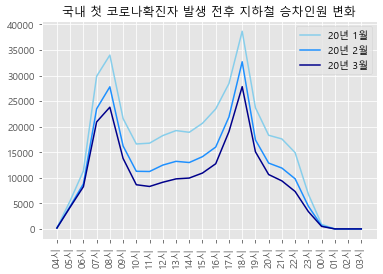

In [20]:
# 2020년 코로나 첫 확진자 발생 시기 전후 지하철 이용자 수 변화 분석

import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)

# 국내 확진자 첫 발생 날짜인 1.21 전후 변화를 살피기 위하여 202001~202003의 데이터를 살펴봄.
sub2001 = subway.loc[subway['사용월']<202002] # 국내첫확진자발생일 1.21이지만 이 csv파일은 월로 구분되어있어 1월과 2월 비교
sub2002 = subway.loc[(subway['사용월']<202003) & (subway['사용월']>202001)]
sub2003 = subway.loc[(subway['사용월']<202004) & (subway['사용월']>202002)]

pd.options.display.float_format = '{:.2f}'.format  # 소숫점 둘째 자리까지만 보이게 하는 코드 추가
time = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시'
        , '18시', '19시', '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시']
stat2001 = sub2001.describe().iloc[1, 1::2]
stat2002 = sub2002.describe().iloc[1, 1::2]
stat2003 = sub2003.describe().iloc[1, 1::2]
stat2001.index = time  # index 깔끔하게 다시 설정
stat2002.index = time
stat2003.index = time

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 글자체 설정
plt.style.use('ggplot')  # plot 그래프 스타일 설정
plt.title('국내 첫 코로나확진자 발생 전후 지하철 승차인원 변화', size=12)  # 제목 설정
plt.plot(stat2001, label='20년 1월', color='skyblue')  
plt.plot(stat2002, label='20년 2월', color='dodgerblue')
plt.plot(stat2003, label='20년 3월', color='darkblue')
plt.xticks(rotation=90)  # x축 값 90도 회전! 글자 안겹치게 하기 위함
plt.legend()  # 범례 표시
plt.show()  # 그래프 얻기

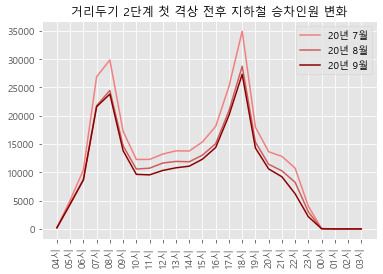

In [22]:
# 2020년 코로나 첫 확진자 발생 시기 전후 지하철 이용자 수 변화 분석

import pandas as pd
subway = pd.read_csv('subway.csv', encoding='cp949')  # UnicodeDecode Error 떠서 encoding 방식 추가. 
subway.drop('작업일자', axis='columns', inplace=True)

# 처음 서울에서 거리두기 2단계 격상이 있었던 8.16 전후 변화를 살피기 위하여 202007~202009의 데이터를 살펴봄.
sub2007 = subway.loc[(subway['사용월']<202008) & (subway['사용월']>202006)]
sub2008 = subway.loc[(subway['사용월']<202009) & (subway['사용월']>202007)]
sub2009 = subway.loc[(subway['사용월']<202010) & (subway['사용월']>202008)]

pd.options.display.float_format = '{:.2f}'.format  # 소숫점 둘째 자리까지만 보이게 하는 코드 추가
time = ['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시'
        , '18시', '19시', '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시']
stat2007 = sub2007.describe().iloc[1, 1::2]
stat2008 = sub2008.describe().iloc[1, 1::2]
stat2009 = sub2009.describe().iloc[1, 1::2]
stat2007.index = time
stat2008.index = time
stat2009.index = time

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.title('거리두기 2단계 첫 격상 전후 지하철 승차인원 변화', size=12)
plt.plot(stat2007, label='20년 7월', color='lightcoral')
plt.plot(stat2008, label='20년 8월', color='indianred')
plt.plot(stat2009, label='20년 9월', color='darkred')
plt.legend()
plt.xticks(rotation=90)
plt.show()